### Outline of Project:

We will assign a numeric score between 1 and 10 for each of the following six dimensions:
1. Motivation. Does the tutorial make the reader believe the topic is relevant or important (i) in
general and (ii) with respect to data science?
2. Understanding. After reading through the tutorial, does an uninformed reader feel informed about
the topic? Would a reader who already knew about the topic feel like s/he learned more about it?
3. Other resources. Does the tutorial link out to other resources (on the web, in books, etc) that
would give a lagging reader additional help on specific topics, or an advanced reader the ability to
dive more deeply into a specific application area or technique?
4. Prose. Does the prose portion of the tutorial actually add to the content of the deliverable?
5. Code. Is the code well written, well documented, reproducible, and does it help the reader understand
the tutorial? Does it give good examples of specific techniques?
6. Subjective evaluation. If somebody linked to this tutorial from, say, Hacker News, would people
actually read through the entire thing



# Exploring Hate Crimes and Antisemitism

## Introduction  
- Briefly introduce the topic of hate crimes and antisemitism.   
- State the objective of the project, which is to analyze hate crime data and explore trends related to antisemitic incidents.   
- Mention the dataset sources (FBI data and ADL data) and their relevance to the analysis.   

In [2]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.tree import DecisionTreeRegressor

C:\Users\eitan\AppData\Local\Temp\ipykernel_41660\4025613340.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


**Introduction**
The Federal Bureau of Investigation reported 6,270 hate crimes in the US in 2016, 7,868 in 2019, and 11,643 in 2022--an 85% increase over six years. In response to this alarming surge in hate crimes across the nation, we present a comprehensive model aimed at tracking and analyzing this disturbing trend. The escalating incidence of hate-motivated offenses underscores the urgent need for proactive measures to understand the trends so they can be addressed. Our model incorporates 



**The Data**




## Data Collection 

This tutorial utilizes a dataset acquired from the Federal Bureau of Investigation. The hate_crime.csv file contains 241,664 hate crimes between 1991 and 2022. 

The database was manually downloaded from a public FBI repository and added to this repository as a csv file and then accessed through a read_csv call, reading the spreadsheet into a DataFrame.

Each hate crime is identified based on the following categories: 
incident_id, data_year, ori, pug_agency_name, pub_agency_unit, agency_type_name, state_abbr, state_name, division_name, region_name, population_group_code, population_group_description, incident_date, adult_victim_count, juvenile_victim_count, total_offender_count, adult_offender_count, juvenile_offender_count, offender_race, offender_ethnicity, victim_count, offense_name, total_individual_victims, location_name, bias_desc, victim_types, multiple_offense, multiple_bias.

For the purpose of this study we are considering data_year (year the incident was reported), state_name (where the incident occurred), agency_type_name (where it occurred--city, county, university, etc), bias_desc (what subgroups were impacted in the incident), offense_name (what type of incident occurred), and incident_date (date the incident occurred). In addition to not requiring the other columns for this particular study, these columns were all completed for every data entry. All other columns were filtered out of the dataframe.

The bias_desc identifies the various types of hate crimes listed, identifying each by the group targeted by the attack.


Before beginning data analysis and prediction, we cleaned the data to remove unneeded columns and to combine similar categories for better representation of types of hate crimes.


DELETE BELOW FINAL DRAFT
- Describe the sources of your data (e.g., FBI Hate Crime Statistics, ADL data).
- Discuss how you obtained the data, including any API calls, web scraping, or manual collection methods.
- Include any necessary code snippets or explanations for retrieving the data.


In [3]:
#Load from csv file
file_path = 'hate_crime.csv'

#read into a DataFrame
all_data = pd.read_csv(file_path)

#Display the DataFrame
print(all_data)



        incident_id  data_year        ori        pug_agency_name  \
0                43       1991  AR0350100             Pine Bluff   
1                44       1991  AR0350100             Pine Bluff   
2                45       1991  AR0600300      North Little Rock   
3                46       1991  AR0600300      North Little Rock   
4                47       1991  AR0670000                 Sevier   
...             ...        ...        ...                    ...   
241658      1473449       2022  WY0190200           Rock Springs   
241659      1473450       2022  WY0010200  University of Wyoming   
241660      1476554       2022  WY0190000             Sweetwater   
241661      1476555       2022  WY0110100               Cheyenne   
241662      1479088       2022  WY0190100            Green River   

       pub_agency_unit       agency_type_name state_abbr state_name  \
0                  NaN                   City         AR   Arkansas   
1                  NaN                   

## Data Processing DRAFT
- Explain how you processed the raw data to make it suitable for analysis.
- Describe any data cleaning steps you performed, such as handling missing values, standardizing formats, or removing duplicates.
- Discuss any transformations or feature engineering you conducted to prepare the data for modeling.

## Data Processing
In this section, we focus on selecting the columns that are relevant for our analysis from the hate crime dataset. We start by examining all the column names to understand the available features in our dataset. This step helps us identify which columns we need to proceed with for further analysis, as well as to clearly display the columns included. Next, we check for missing values across all columns to assess the data quality. If there are missing values, we'll need to decide how to handle them. In this case, we may choose to drop rows with missing data assuming they are unneeded for our later analyses. 

Finally, we create a new DataFrame named only_relevant containing only the selected relevant columns for our analysis.

In [4]:
#Preprocessing: Selecting relevant columns
column_names = all_data.columns.tolist()
print(column_names)

# Checking missing values
missing_values = all_data.isnull().sum()
print("Missing Values:")
#print(missing_values)

# Addressing missing data
# In this case, we will drop rows with missing data because they are irrelevant for our analysis.
only_relevant = all_data[['data_year','state_name', 'agency_type_name', 'bias_desc', 'offense_name', 'incident_date']]
print(only_relevant)



['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'offender_race', 'offender_ethnicity', 'victim_count', 'offense_name', 'total_individual_victims', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias']
Missing Values:
        data_year state_name       agency_type_name  \
0            1991   Arkansas                   City   
1            1991   Arkansas                   City   
2            1991   Arkansas                   City   
3            1991   Arkansas                   City   
4            1991   Arkansas                 County   
...           ...        ...                    ...   
241658       2022    Wyoming                   City   
241659      

## Exploratory Data Analysis:




- Present visualizations and summaries to explore the characteristics of the dataset.
- Analyze trends, patterns, and distributions in hate crime data over time, by location, or other relevant factors.
- Identify any interesting findings or insights from the EDA.

### Exploratory Data Analysis (EDA) on FBI Hate Crime Data

#### Total Hate Crimes Over the Years

We start by examining the total number of hate crimes reported each year. This line plot visualizes the trend of hate crimes reported over the years.

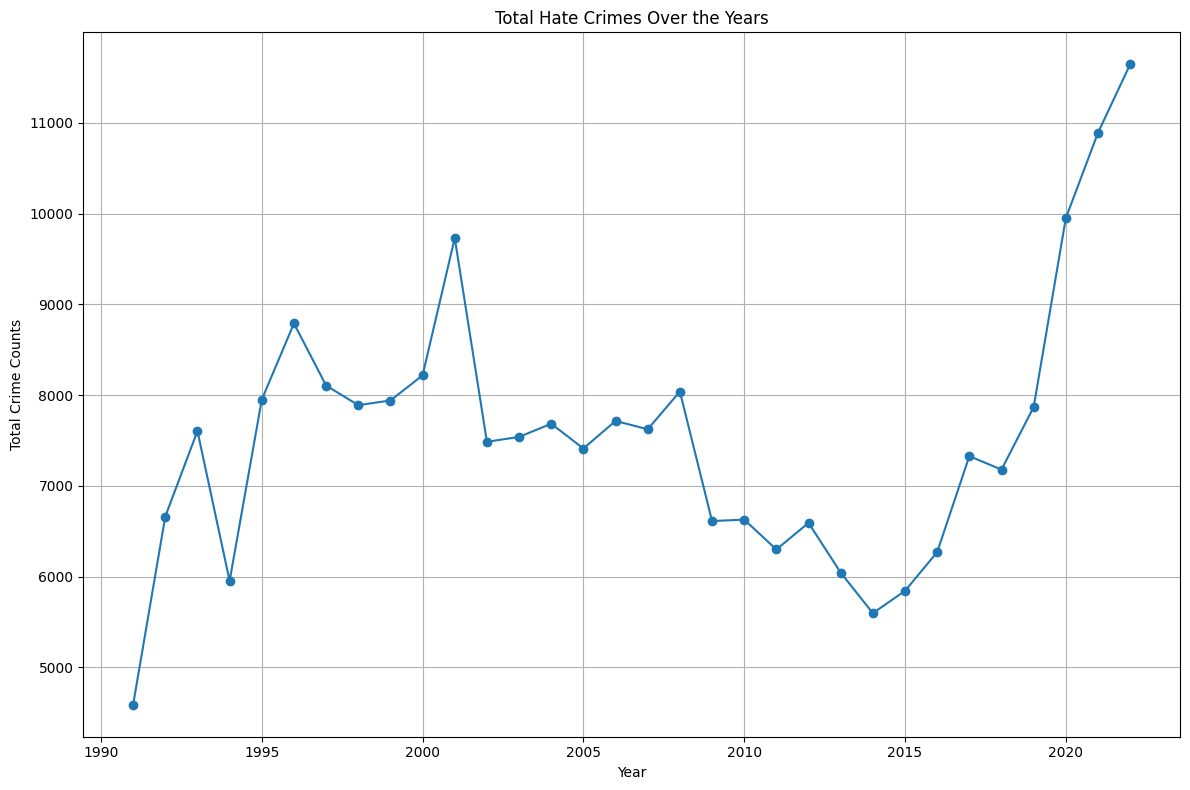

In [5]:
# Group the data by 'data_year' and count the total number of hate crimes for each year
total_crime_counts = only_relevant.groupby('data_year').size().reset_index(name='total_crimes')

# Plot total hate crimes over the years
plt.figure(figsize=(12, 8))
plt.plot(total_crime_counts['data_year'], total_crime_counts['total_crimes'], marker='o', linestyle='-')
plt.title('Total Hate Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Hate Crimes per Bias Type
Next, we explore hate crimes categorized by different bias types.  
This line plot illustrates the distribution of hate crimes across different bias types over the years.
Further detail will be provided below--This is meant to demonstrate the quantity of bias types analyzed, as well as a representation of some of those with higher quantities.

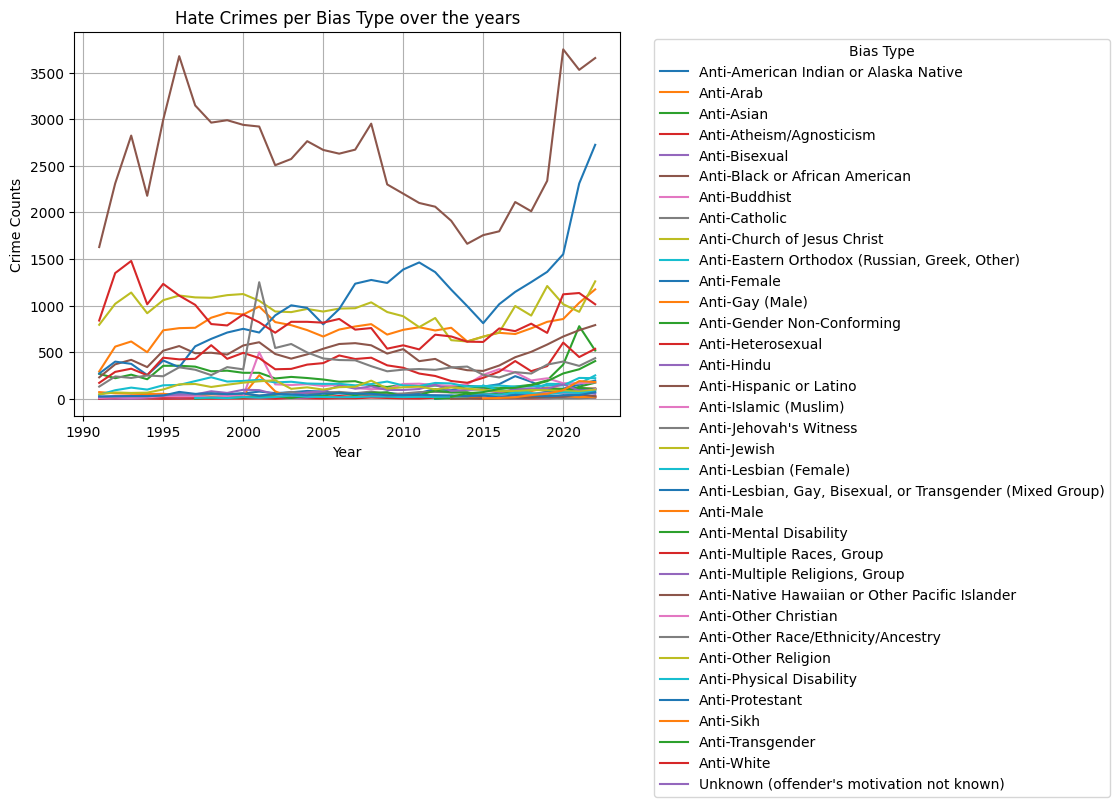

In [6]:
#Since the dataset includes multiple types of biases in each bias description, we first need to separate each bias type. 

og_expand = only_relevant.assign(bias_desc=only_relevant['bias_desc'].str.split(', ')).explode('bias_desc')
expanded_data = og_expand.assign(bias_desc=only_relevant['bias_desc'].str.split(';')).explode('bias_desc')

#We then calculate crime counts per bias type per year
crime_counts = expanded_data.groupby(['data_year', 'bias_desc']).size().reset_index(name='count_of_crimes')

pivot_table = crime_counts.pivot(index='data_year', columns='bias_desc', values='count_of_crimes')

for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], label=category)

plt.title('Hate Crimes per Bias Type over the years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()

plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#### Percentage of Hate Crimes by State
Now, let's analyze the geographical distribution of hate crimes.  
This pie chart shows the percentage of hate crimes reported in each state.


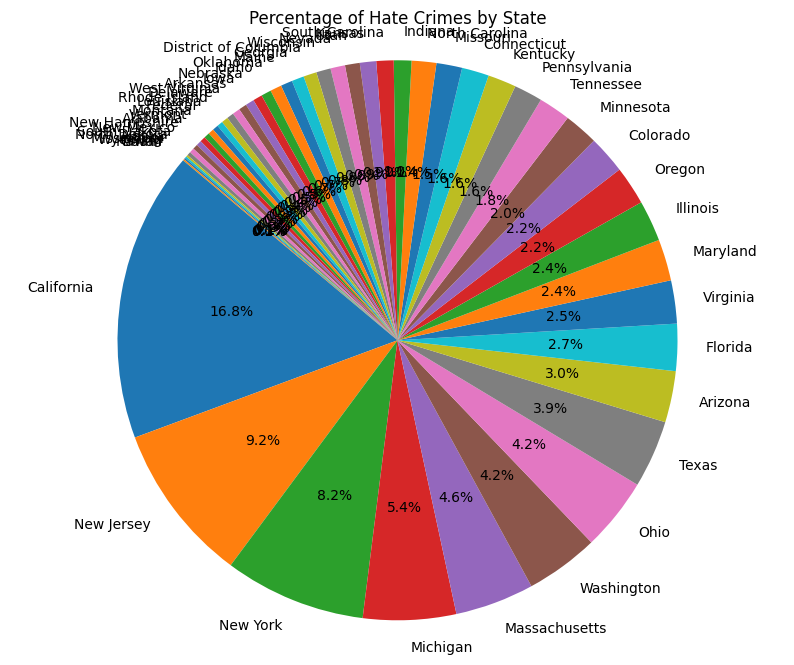

In [7]:
percentage_per_state = (expanded_data['state_name'].value_counts() / len(expanded_data)) * 100

# Plotting
plt.figure(figsize=(10, 8))
percentage_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Hate Crimes by State')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


#### Hate Crimes broken down into different offense types

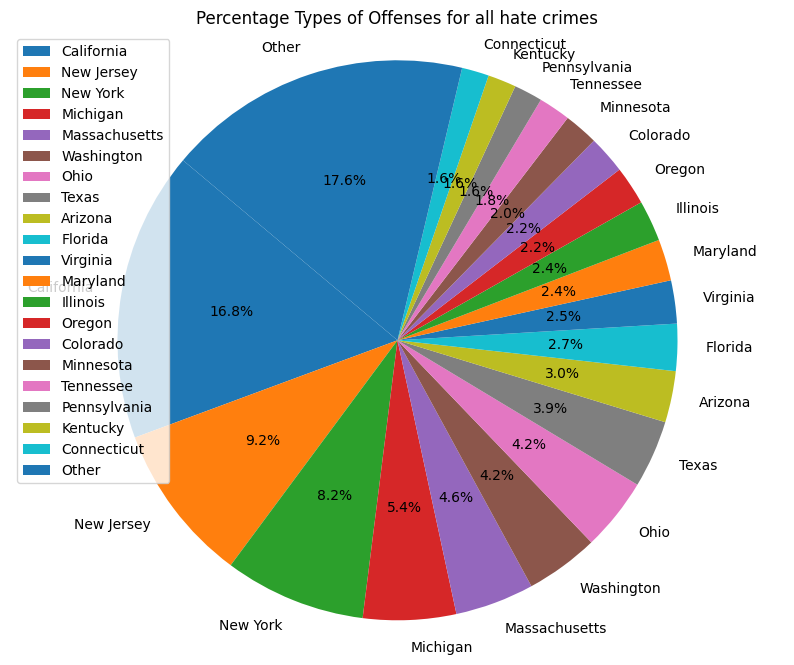

In [8]:
# Filter out categories with percentages less than 1.5%
other_threshold = 1.5
main_categories = percentage_per_state[percentage_per_state >= other_threshold]
other_categories = percentage_per_state[percentage_per_state < other_threshold]

# Combine the filtered categories into an "other" category
other_percentage = other_categories.sum()
main_categories['Other'] = other_percentage

# Plotting
plt.figure(figsize=(10, 8))
main_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Types of Offenses for all hate crimes')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with the 'Other' category
plt.legend(main_categories.index, loc='best')

plt.show()


### Exploratory Data Analysis (EDA) on Anti-Semitic Hate Crimes
Our primary topic of interest.
Provide visualization for it and then summarize and report after. 

#### Hate Crimes with Anti-Jewish Bias Over the Years
Let's focus specifically on anti-Semitic hate crimes and analyze their trend over the years.  
This line plot displays the trend of anti-Semitic hate crimes reported each year.




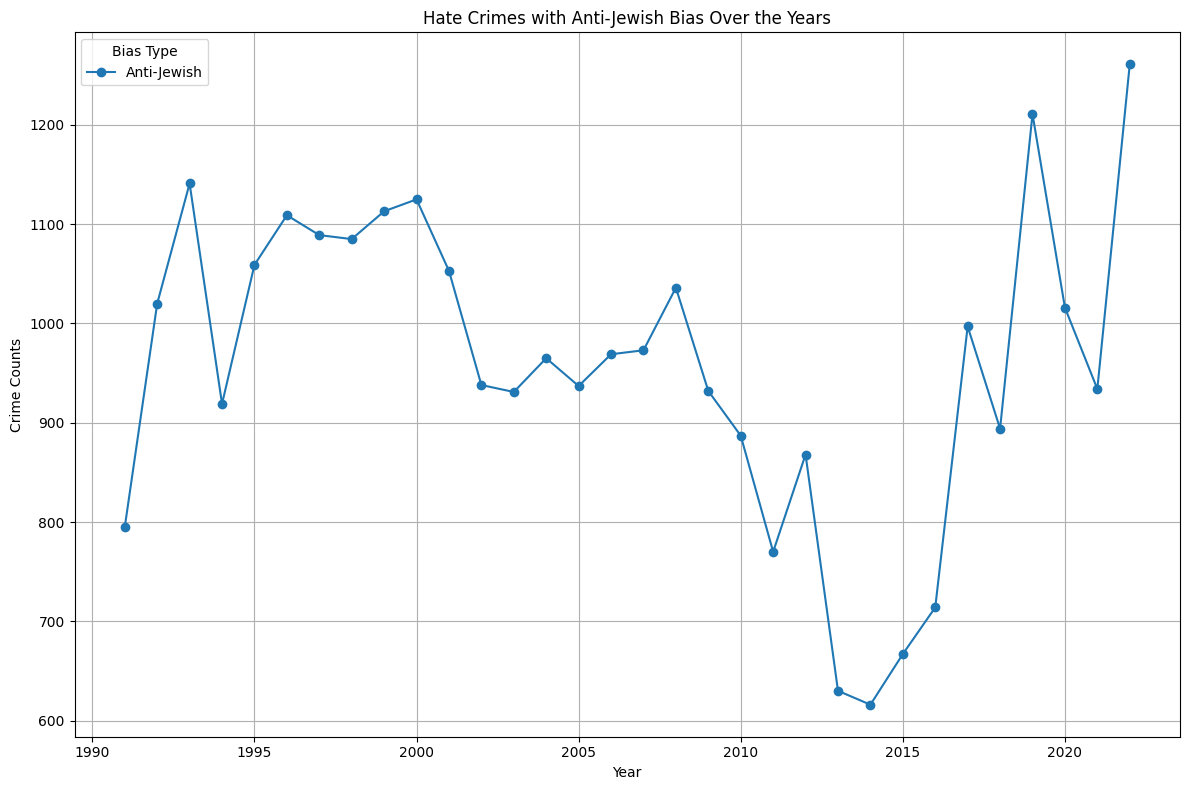

In [9]:
# Filter the expanded_data DataFrame to include only the rows with the "Anti-Jewish" bias category
anti_jewish_data = expanded_data[expanded_data['bias_desc'] == 'Anti-Jewish']

# Group the filtered data by 'data_year' and count the number of hate crimes for each year
crime_counts_anti_jewish = anti_jewish_data.groupby('data_year').size().reset_index(name='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(crime_counts_anti_jewish['data_year'], crime_counts_anti_jewish['count_of_crimes'], marker='o', label='Anti-Jewish')

plt.title('Hate Crimes with Anti-Jewish Bias Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type')
plt.show()


#### Percentage of Anti-Semitic Acts by State
Now, let's examine the geographical distribution of anti-Semitic hate crimes.  
This pie chart visualizes the percentage of anti-Semitic hate crimes reported in each state.


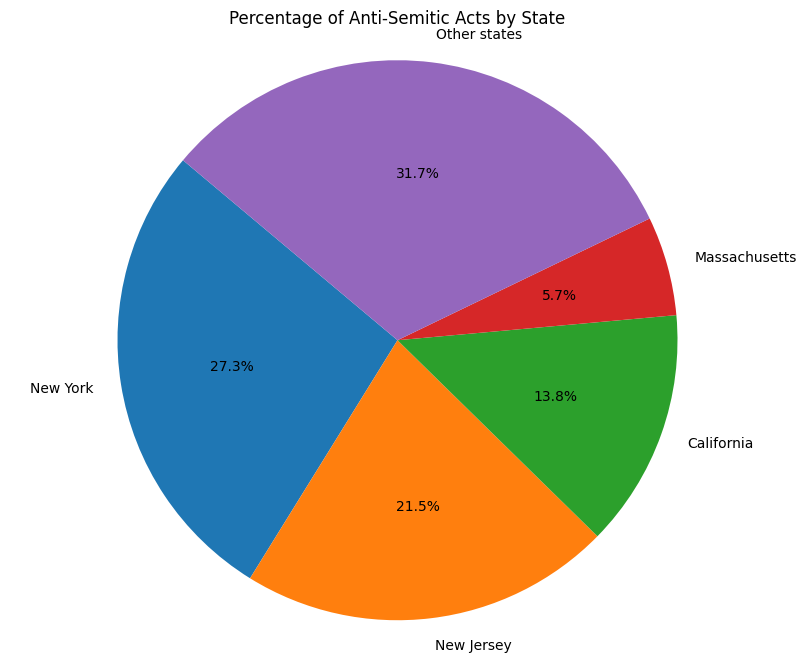

In [10]:
# Calculate the percentage of anti-Semitic acts by state
percentage_per_state = (anti_jewish_data['state_name'].value_counts() / len(anti_jewish_data)) * 100

# Group states with less than 5% of the total anti-Semitic acts into "Other states"
other_states_threshold = 5
main_states = percentage_per_state[percentage_per_state >= other_states_threshold]
other_states = percentage_per_state[percentage_per_state < other_states_threshold]
other_states_combined = pd.Series([other_states.sum()], index=['Other states'])

# Combine main states and other states
final_percentage_per_state = pd.concat([main_states, other_states_combined])

# Plotting
plt.figure(figsize=(10, 8))
final_percentage_per_state.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Anti-Semitic Acts by State')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()



#### Types of Anti-Semitic Offenses
Lastly, let's explore the types of offenses associated with anti-Semitic hate crimes.  
This pie chart illustrates the distribution of different types of offenses associated with anti-Semitic hate crimes.  
RESULTS: 

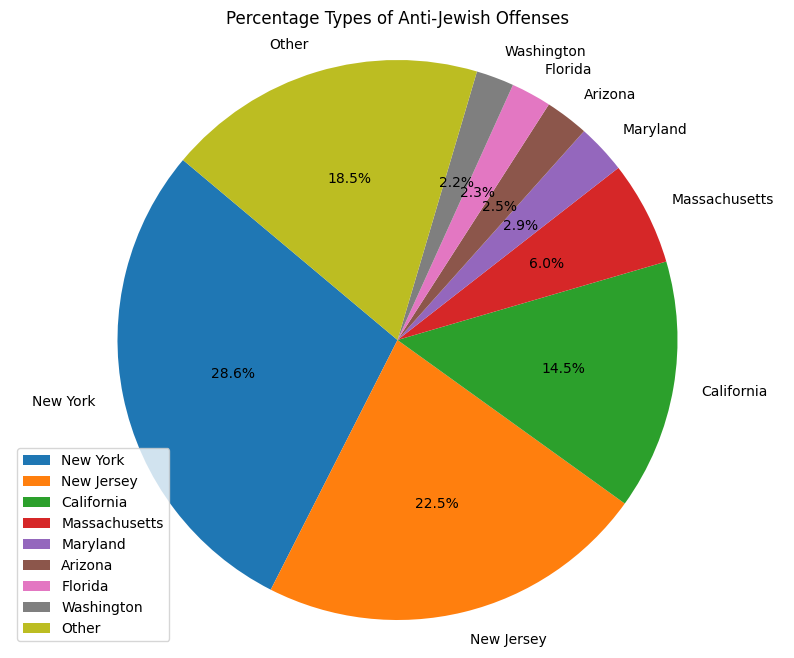

Other Categories:
state_name
Missouri                1.485663
North Carolina          1.422497
Indiana                 1.016069
South Carolina          0.998383
Kansas                  0.942436
Utah                    0.852199
Nevada                  0.839927
Wisconsin               0.834512
District of Columbia    0.760879
Georgia                 0.708181
Maine                   0.675695
Oklahoma                0.661257
Idaho                   0.578600
Nebraska                0.535286
Iowa                    0.500635
Arkansas                0.459126
West Virginia           0.435665
Delaware                0.401374
Rhode Island            0.377913
Louisiana               0.336043
Federal                 0.330629
Montana                 0.330629
Vermont                 0.324853
Alabama                 0.313664
New Hampshire           0.301392
New Mexico              0.288398
South Dakota            0.279735
North Dakota            0.215847
Alaska                  0.109728
Mississippi   

In [11]:
# Filter out categories with percentages less than 2%
main_categories = percentage_per_state[percentage_per_state >= 2]
other_states = percentage_per_state[percentage_per_state < 2]

# Combine the filtered categories into an "other" category
other_percentage = other_categories.sum()
main_categories['Other'] = other_percentage

# Plotting
plt.figure(figsize=(10, 8))
main_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Types of Anti-Jewish Offenses')
plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add legend with the 'Other' category
plt.legend(main_categories.index, loc='best')
plt.show()

print('Other Categories:')
print(other_categories)

## Analysis, hypothesis testing, & ML

- Formulate hypotheses or research questions related to hate crimes or antisemitism.
- Conduct hypothesis tests or statistical analyses to answer these questions.
- Develop machine learning models to predict hate crime counts, identify trends, or classify hate crime incidents.
- Evaluate model performance and interpret the results.   



STILL NEED TO BUILD THE ADL MODEL AND COMPARE IT 

In [12]:
#import data from the ADL on antisemetic incidents in the last 3 years
file_path = 'HEATMapData (1).csv'

#read into a DataFrame
adl_data = pd.read_csv(file_path)

adl_relevant = adl_data[['date','state', 'type', 'description']]

# Create new column of "data_year"
adl_relevant['date'] = pd.to_datetime(adl_relevant['date'], errors='coerce')

# Extract year and create a new column
adl_relevant['data_year'] = adl_relevant['date'].dt.year

# Split the 'type' column into two separate columns
adl_relevant[['bias_type', 'offense type']] = adl_relevant['type'].str.split(':', n=1, expand=True)

# Drop the original 'type' column
adl_relevant.drop(columns=['type'], inplace=True)


# Display the DataFrame with the new columns
print(adl_relevant)


            date state                                        description  \
0     2023-12-31    CA  An individual vandalized the building of a Jew...   
1     2023-12-31    MD  A sign calling for the return of Israeli hosta...   
2     2023-12-31    NJ  A swastika and the words, "Don't be Jewish" we...   
3     2023-12-31    TX  A synagogue was targeted with an antisemitic b...   
4     2023-12-31    TX  A synagogue was targeted with an antisemitic b...   
...          ...   ...                                                ...   
51865        NaT    CO  Jewish woman received an email from a neighbor...   
51866        NaT    NJ  Two swastikas drawn on mats at private residence.   
51867        NaT    MA                                       Confidential   
51868        NaT    FL  High school soccer fans chanted anti-Semitic s...   
51869        NaT    MA                                       Confidential   

       data_year             bias_type offense type  
0         2023.0  Ant

C:\Users\eitan\AppData\Local\Temp\ipykernel_41660\4009752573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adl_relevant['date'] = pd.to_datetime(adl_relevant['date'], errors='coerce')
C:\Users\eitan\AppData\Local\Temp\ipykernel_41660\4009752573.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adl_relevant['data_year'] = adl_relevant['date'].dt.year
C:\Users\eitan\AppData\Local\Temp\ipykernel_41660\4009752573.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

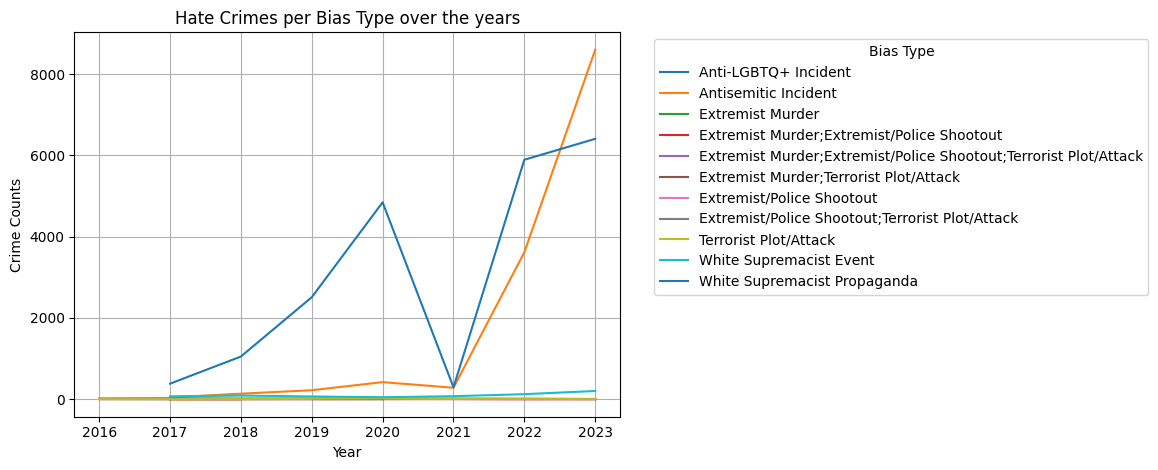

In [13]:
crime_counts = adl_relevant.groupby(['data_year', 'bias_type']).size().reset_index(name='count_of_crimes')

pivot_table = crime_counts.pivot(index='data_year', columns='bias_type', values='count_of_crimes')

for category in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[category], label=category)

plt.title('Hate Crimes per Bias Type over the years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()

plt.legend(title='Bias Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [14]:
anti_jewish_data = expanded_data[expanded_data['bias_desc'] == 'Anti-Jewish'][['data_year', 'state_name']]


#anti_jewish_data = expanded_data[['data_year', 'state_name']]

print(anti_jewish_data)



        data_year     state_name
13           1991        Arizona
19           1991        Arizona
26           1991        Arizona
38           1991        Arizona
39           1991        Arizona
...           ...            ...
241556       2022      Wisconsin
241580       2022      Wisconsin
241608       2022  West Virginia
241626       2022  West Virginia
241632       2022  West Virginia

[30654 rows x 2 columns]


#### Feature Engineering and Model Building
We split the data into features (X) and target variable (y), and perform one-hot encoding for categorical features. Then, we split the data into training and testing sets using the train_test_split function. We train a linear regression model to predict the hate crime counts based on the features. After training the model, we evaluate its performance using mean squared error (MSE). Additionally, we perform a chi-square test to analyze the independence between 'state_name' and 'hate_crime_count'. Lastly, we train a decision tree regression model and evaluate its performance using MSE. This analysis helps us understand the relationship between the occurrence of hate crimes and various factors such as time and location, and enables us to make predictions using machine learning models. 

In [15]:
# Group the data by 'data_year' and 'state_name' and count the number of hate crimes for each group
hate_crime_counts = anti_jewish_data.groupby(['data_year', 'state_name']).size().reset_index(name='hate_crime_count')

# Create a new DataFrame with 'data_year', 'state_name', and 'hate_crime_count'
new_df = hate_crime_counts.copy()

X = new_df[['data_year', 'state_name']]
y = new_df['hate_crime_count']


# Perform one-hot encoding for categorical features
X_encoded = pd.get_dummies(X, columns=['state_name'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)



Mean Squared Error: 237.44848886754707


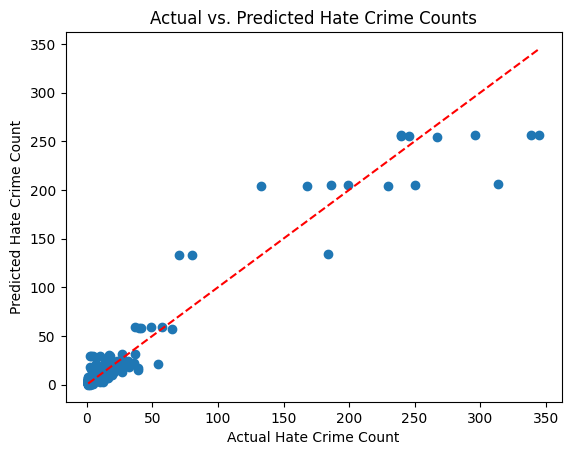

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Hate Crime Count')
plt.ylabel('Predicted Hate Crime Count')
plt.title('Actual vs. Predicted Hate Crime Counts')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line

plt.show()

In [17]:

contingency_table = pd.crosstab(new_df['state_name'], new_df['hate_crime_count'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square statistic:', chi2)
print('p-value:', p)

Chi-square statistic: 7472.37029473799
p-value: 0.7297922475710367


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the decision tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print('Decision Tree MSE:', mse_dt)

Decision Tree MSE: 208.77551020408163


## Insight & Policy Decision
- Summarize key insights and conclusions drawn from the analysis.
- Discuss the implications of the findings for policymakers, law enforcement, or advocacy groups.
- Propose potential policy recommendations or interventions based on the analysis.
- Reflect on the limitations of the study and areas for future research.


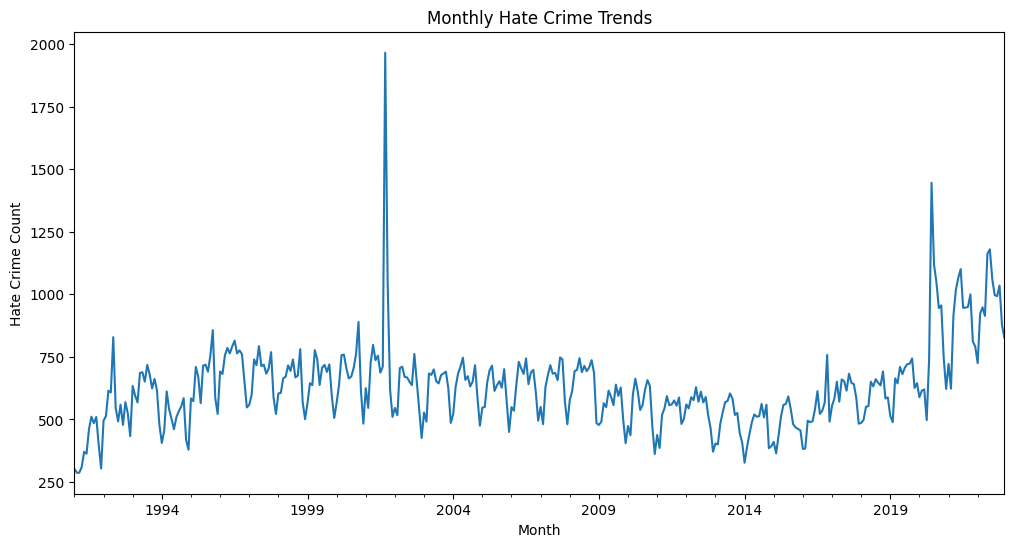

['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'offender_race', 'offender_ethnicity', 'victim_count', 'offense_name', 'total_individual_victims', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias']


KeyError: 'age_group'

In [20]:
#Temporal Analysis

# Group data by month and count hate crimes
all_data['incident_date'] = pd.to_datetime(all_data['incident_date'])
monthly_counts = only_relevant.groupby(all_data['incident_date'].dt.to_period('M')).size()

# Plot monthly hate crime counts
monthly_counts.plot(kind='line', figsize=(12, 6), xlabel='Month', ylabel='Hate Crime Count', title='Monthly Hate Crime Trends')
plt.show()


#Demographic Analysis

# Group data by demographic variables and count hate crimes
print(all_data.columns.tolist())
demographic_counts = all_data.groupby(['age_group', 'gender']).size()


# Plot demographic breakdown of hate crimes
demographic_counts.plot(kind='bar', figsize=(12, 6), xlabel='Demographic Group', ylabel='Hate Crime Count', title='Demographic Analysis of Hate Crimes')
plt.show()

#Sentiment Analysis 

# Perform sentiment analysis on hate crime descriptions using TextBlob or NLTK
from textblob import TextBlob

# Example: Compute sentiment polarity of hate crime descriptions
all_data['sentiment_polarity'] = all_data['description'].apply(lambda x: TextBlob(x).sentiment.polarity)




#Spatial Analysis 

# Plot spatial distribution of hate crimes using geospatial libraries like GeoPandas or Plotly
import geopandas as gpd

# Example: Create a choropleth map of hate crime counts by state
usa = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
state_counts = all_data['state_name'].value_counts()
usa['hate_crime_count'] = usa['name'].map(state_counts)
usa.plot(column='hate_crime_count', cmap='OrRd', figsize=(15, 10), legend=True)
plt.title('Hate Crime Counts by State')
plt.show()



#Comparative Analysis
# Compare hate crime trends between different regions or time periods
region_counts = all_data.groupby(['region', 'data_year']).size().unstack()
region_counts.plot(kind='line', figsize=(12, 6), xlabel='Year', ylabel='Hate Crime Count', title='Hate Crime Trends by Region')
plt.show()

#Predictive Modeling 

# Develop predictive models using scikit-learn or TensorFlow/Keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Example: Train a random forest regressor to predict hate crime counts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)




Trend Analysis: Summarize the trends observed in hate crime data, including overall counts, distribution across bias types, and changes over time.  
Geographical Analysis: Highlight any geographic patterns in hate crime occurrence, such as hotspots or differences between states.  
Bias Types: Discuss the prevalence of different bias types, focusing on significant findings, such as an increase in anti-Semitic acts.  
Predictive Modeling: Reflect on the predictive modeling results, including the accuracy of the models and their potential utility in forecasting hate crime counts.  

Policy Implications:
Targeted Interventions: Discuss the need for targeted interventions in areas with high hate crime rates or specific bias types, based on the geographic and bias type analysis.
Community Engagement: Emphasize the importance of community engagement and support programs to address underlying causes of hate crimes and promote tolerance and understanding.
Law Enforcement Training: Advocate for specialized training for law enforcement agencies to effectively identify, report, and respond to hate crimes.
Legislative Measures: Propose legislative measures to strengthen hate crime laws, enhance reporting mechanisms, and ensure adequate support for victims and affected communities.



In the "Insight & Policy Decision" section, you'll summarize the key findings and their implications for policymakers, law enforcement, or advocacy groups. Here's what you can include:

Key Insights:
Trend Analysis: Summarize the trends observed in hate crime data, including overall counts, distribution across bias types, and changes over time.
Geographical Analysis: Highlight any geographic patterns in hate crime occurrence, such as hotspots or differences between states.
Bias Types: Discuss the prevalence of different bias types, focusing on significant findings, such as an increase in anti-Semitic acts.
Predictive Modeling: Reflect on the predictive modeling results, including the accuracy of the models and their potential utility in forecasting hate crime counts.
Policy Implications:
Targeted Interventions: Discuss the need for targeted interventions in areas with high hate crime rates or specific bias types, based on the geographic and bias type analysis.
Community Engagement: Emphasize the importance of community engagement and support programs to address underlying causes of hate crimes and promote tolerance and understanding.
Law Enforcement Training: Advocate for specialized training for law enforcement agencies to effectively identify, report, and respond to hate crimes.
Legislative Measures: Propose legislative measures to strengthen hate crime laws, enhance reporting mechanisms, and ensure adequate support for victims and affected communities.
Limitations and Future Research:
Data Limitations: Acknowledge any limitations in the data analysis, such as incomplete or biased datasets, and discuss how these limitations may impact the conclusions drawn.
Need for Further Study: Identify areas for future research, such as exploring the root causes of hate crimes, evaluating the effectiveness of policy interventions, or examining the long-term impact of hate crime legislation.
Conclusion:
Call to Action: Conclude with a call to action, emphasizing the importance of addressing hate crimes and promoting inclusivity, tolerance, and respect in society.
Commitment to Change: Express a commitment to continuing efforts to combat hate crimes and work towards a more equitable and just society.

# THIS IS OLD STUFF FIGURE OUT IF WE NEED IT

In [ ]:
# Filter data for years 2016 onwards
data_2016_onward = anti_jewish_data[anti_jewish_data['data_year'] >= 2016]

# Drop irrelevant columns and encode categorical variables
data_encoded = pd.get_dummies(data_2016_onward, columns=['state_name'])

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['data_year'])  # Features
y = data_encoded['data_year']  # Target variable (year)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.23115220483641535
Classification Report:
              precision    recall  f1-score   support

        2016       0.12      0.01      0.02       158
        2017       0.24      0.29      0.27       207
        2018       0.00      0.00      0.00       171
        2019       0.24      0.37      0.29       229
        2020       0.22      0.04      0.07       195
        2021       0.39      0.10      0.16       188
        2022       0.21      0.58      0.31       258

    accuracy                           0.23      1406
   macro avg       0.21      0.20      0.16      1406
weighted avg       0.21      0.23      0.18      1406



/Users/dayanovich/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Filter data for years 2016 onwards
data_2016_onward = anti_jewish_data[anti_jewish_data['data_year'] >= 2016]

# Drop irrelevant columns and encode categorical variables
data_encoded = pd.get_dummies(data_2016_onward, columns=['state_name'])

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(columns=['data_year'])  # Features
y = data_encoded['data_year']  # Target variable (year)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Other evaluation metrics can be used depending on the context of your regression task
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 3.9172139761606455
R-squared: 0.02205693415472898


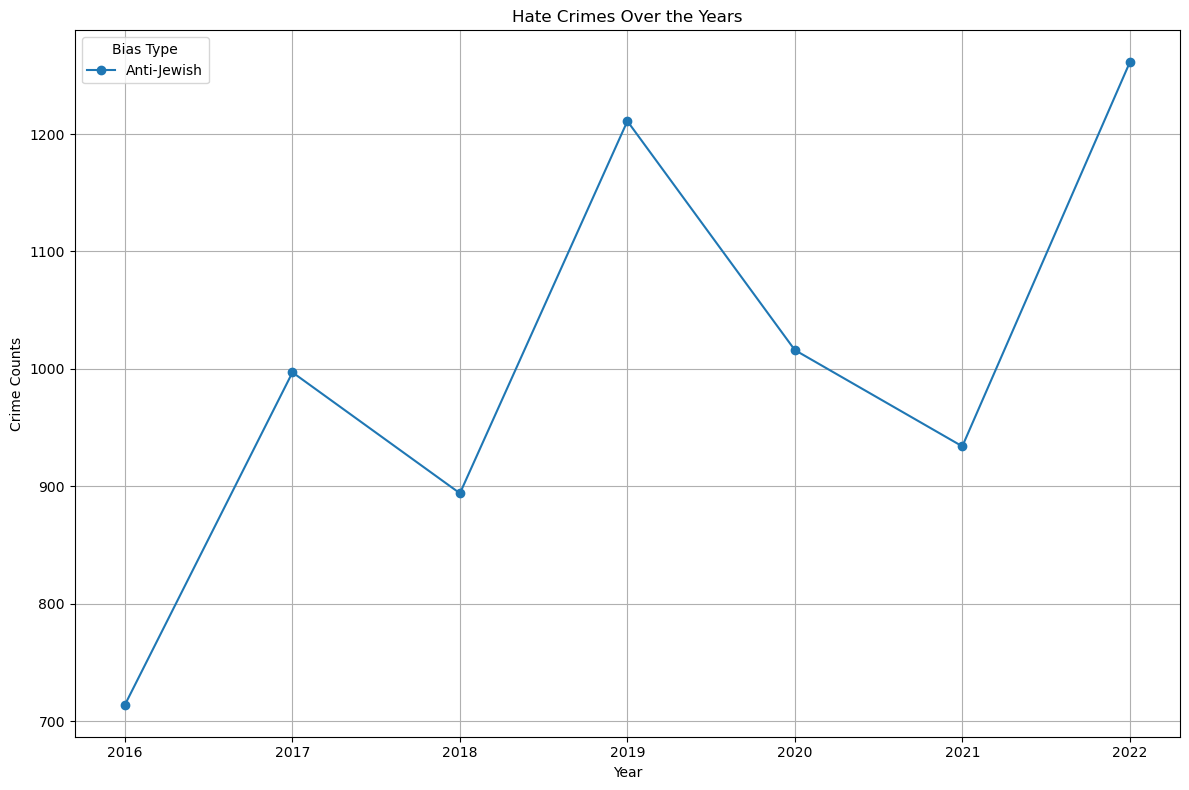

In [ ]:
crime_counts_anti_jewish = data_2016_onward.groupby('data_year').size().reset_index(name='count_of_crimes')

# Plotting
plt.figure(figsize=(12, 8))

plt.plot(crime_counts_anti_jewish['data_year'], crime_counts_anti_jewish['count_of_crimes'], marker='o', label='Anti-Jewish')

plt.title('Hate Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Bias Type')
plt.show()